## Install Dependencies

In [ ]:
!pip install scipy==1.11.3

In [ ]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
import time
from skimage.util import random_noise
from skimage.transform import rotate
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading Libraries

In [ ]:
data = sio.loadmat('Data_hoda_full.mat')

In [ ]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


In [ ]:
images = data['Data']
labels = data['labels']

In [ ]:
(images[0][0])

array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

## Preprocessing

### Put Image in Center

In [ ]:
max_width = 0
max_height = 0
for i in range(len(images)):
  tmp = images[i][0].shape
  if tmp[0] > max_width:
    max_width = tmp[0]
  if tmp[1] > max_height:
    max_height = tmp[1]

print(max_width, max_height)

62 51


In [ ]:
def put_frame(image):
  frame_size = (64, 64)
  frame = np.zeros(frame_size, dtype=np.float32)

  x_offset = (frame_size[1] - image.shape[1]) // 2
  y_offset = (frame_size[0] - image.shape[0]) // 2

  frame[y_offset:y_offset + image.shape[0], x_offset:x_offset + image.shape[1]] = image

  return frame

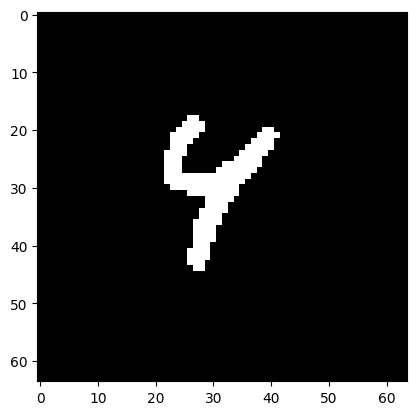

In [ ]:
plt.imshow(put_frame(images[0][0]), cmap='gray')
plt.show()


In [ ]:
new_data1 = []

for i in range(len(images)):
  new_data1.append(put_frame(images[i][0]))

In [ ]:
def show_images(num_images, data):
  num_cols = 10
  num_rows = num_images % num_cols

  if num_rows == 0:
    num_rows = num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

  axes = axes.flatten()

  for i in range(num_images):
      axes[i].imshow(data[i], cmap='gray')
      axes[i].axis('off')

  plt.tight_layout()

  plt.show()

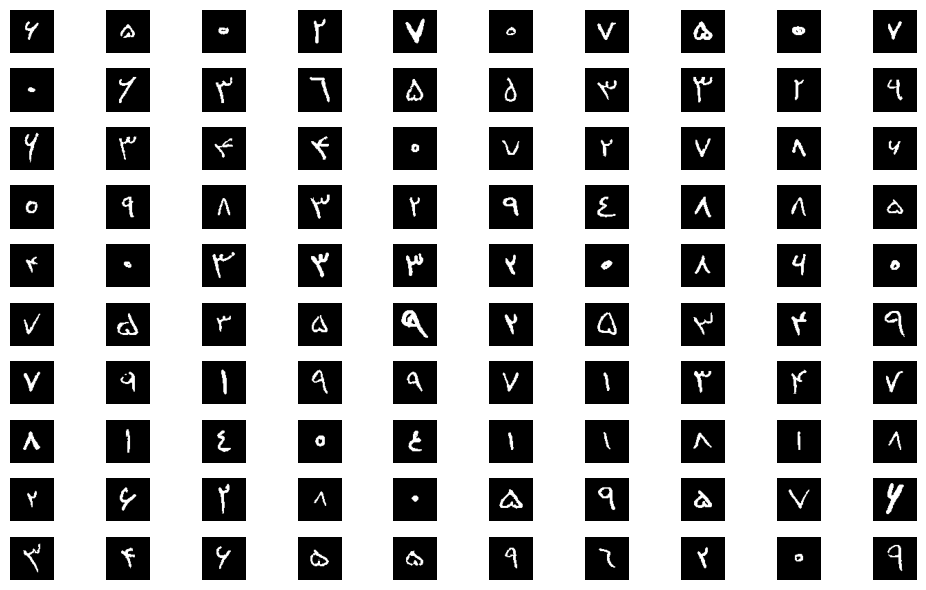

In [ ]:
show_images(100, new_data1)

### Resizing Image

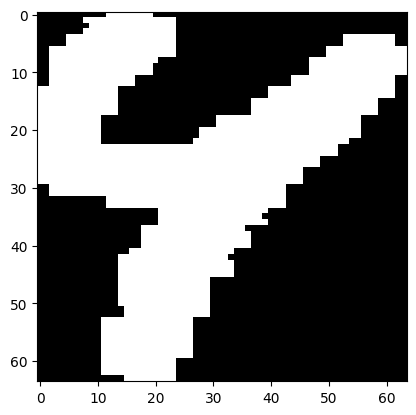

In [ ]:
image_data = images[0][0]

image_data = image_data.astype(np.uint8)

image = Image.fromarray(image_data)
resized_image = image.resize((64,64))

resized_image_array = np.array(resized_image)
resized_image_array = np.where(resized_image_array > 0, 1, 0)

plt.imshow(resized_image_array, cmap='gray')
plt.show()

In [ ]:
def resize_image(image):
  image = image.astype(np.uint8)

  image = Image.fromarray(image)
  resized_image = image.resize((32,32))

  resized_image_array = np.array(resized_image)
  resized_image_array = np.where(resized_image_array > 127, 1, 0)

  return resized_image_array

In [ ]:
new_data2 = []

for i in range(len(images)):
  new_data2.append(resize_image(images[i][0]))

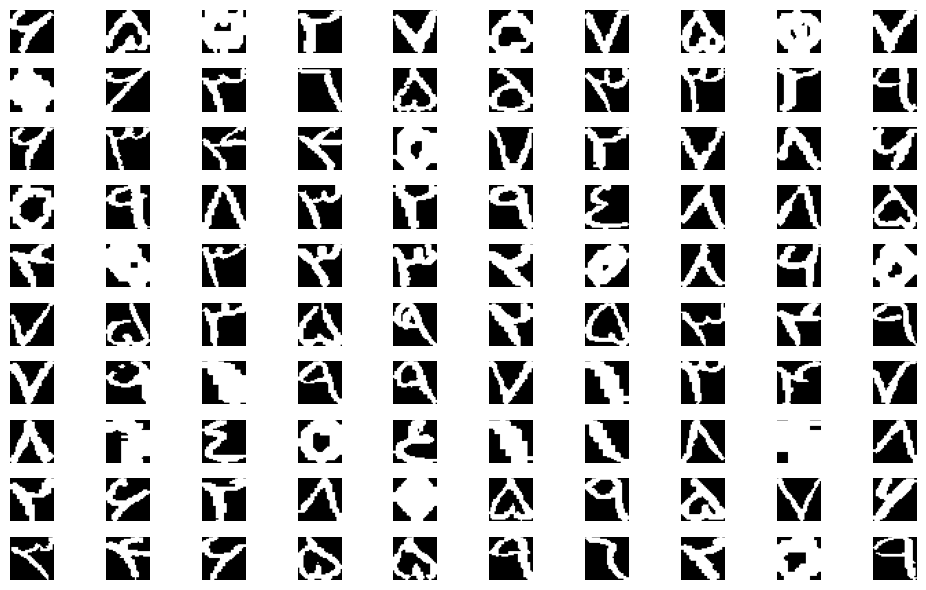

In [ ]:
show_images(100, new_data2)

this method ( resizing images ) is not good for this work and prefer to wrok with new_data1

---


## Feature Extraction

In [ ]:
# labels = [x[0] for x in labels]

# X_train, X_test = new_data1[:50000], new_data1[50000:60000]
# y_train, y_test = labels[:50000], labels[50000:60000]

In [ ]:
labels = [x[0] for x in labels]

X_train, X_test = new_data1[:3000], new_data1[3000:4000]
y_train, y_test = labels[:3000], labels[3000:4000]

### Gradient

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
def extract_gradient_features(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

    magnitude = np.sqrt(sobelx**2 + sobely**2)
    orientation = np.arctan2(sobely, sobelx)

    return np.concatenate((magnitude.flatten() , orientation.flatten()))


In [ ]:
X_train_gradient = np.array([extract_gradient_features(img) for img in X_train])
X_test_gradient = np.array([extract_gradient_features(img) for img in X_test])

### Histogram

In [ ]:
def vertical_horizontal_histogram(image):
    vertical_hist = np.sum(image, axis=0)
    horizontal_hist = np.sum(image, axis=1)
    return np.concatenate((vertical_hist, horizontal_hist))

X_train_hist = np.array([vertical_horizontal_histogram(img) for img in X_train])
X_test_hist = np.array([vertical_horizontal_histogram(img) for img in X_test])

In [ ]:
print(len(X_train_hist[0]))

128


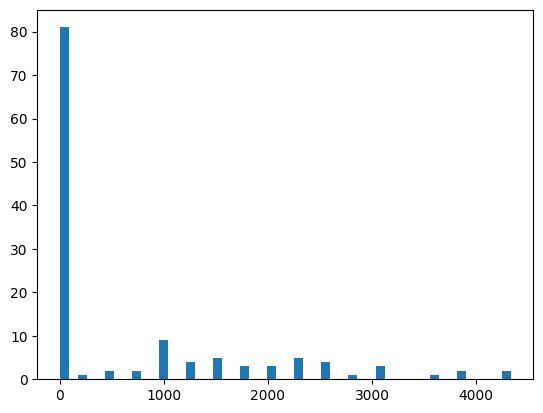

In [ ]:
plt.hist(X_train_hist[0], bins=50)
plt.show()

### Zoning

In [ ]:
def zoning(image, zones=(4, 4)):
    h, w = image.shape
    h_zones, w_zones = zones
    zone_height, zone_width = h // h_zones, w // w_zones
    features = []
    for i in range(h_zones):
        for j in range(w_zones):
            zone = image[i*zone_height:(i+1)*zone_height, j*zone_width:(j+1)*zone_width]
            features.extend([np.mean(zone), np.std(zone)])
    return features

X_train_zoning = np.array([zoning(img) for img in X_train])
X_test_zoning = np.array([zoning(img) for img in X_test])

In [ ]:
print(X_train_zoning[0])

[  0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        71.71875  114.650345
  52.79297  103.32042    0.         0.         0.         0.
  46.816406  98.7239     3.984375  31.624994   0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.      ]



---


## Different Classifiers

### KNN Classifier

In [ ]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [ ]:
def find_best_k(range_k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier()
    best_k = None
    best_accuracy = 0

    accuracies = []

    for k in range_k:
        knn.n_neighbors = k
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    plt.plot(range_k, accuracies, marker='o', linestyle='-')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Distribution of Accuracies for Different k Values')
    plt.xticks(range_k)
    plt.show()

    return best_k

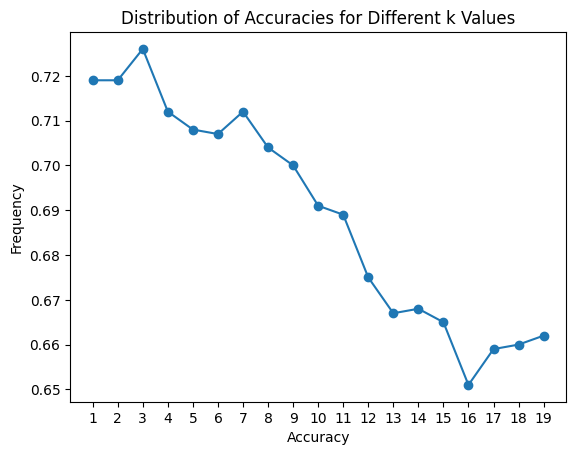

Best k for KNN: 3


In [ ]:
number_of_data = 1000
best_k_knn = find_best_k(range(1, 20), X_train_hist[:number_of_data], y_train[:number_of_data], X_test_hist[:number_of_data], y_test[:number_of_data])
print(f"Best k for KNN: {best_k_knn}")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k_knn)
knn.fit(X_train_gradient, y_train)
knn_predictions = knn.predict(X_test_gradient)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.94


### Nearest Centroid Classifier

In [ ]:
class NearestCentroid:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.centroids_ = np.array([X[y == cls].mean(axis=0) for cls in self.classes_])

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids_, axis=2)
        return self.classes_[np.argmin(distances, axis=1)]

In [ ]:
nc = NearestCentroid()
nc.fit(X_train_hist, y_train)
nc_predictions = nc.predict(X_test_hist)
nc_accuracy = accuracy_score(y_test, nc_predictions)
print(f"Nearest Centroid Accuracy: {nc_accuracy}")

Nearest Centroid Accuracy: 0.59


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.mean_ = {}
        self.var_ = {}
        self.priors_ = {}

        for cls in self.classes_:
            X_c = X[y == cls]
            self.mean_[cls] = X_c.mean(axis=0)
            self.var_[cls] = X_c.var(axis=0)
            self.priors_[cls] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for cls in self.classes_:
            prior = np.log(self.priors_[cls])
            class_conditional = np.sum(np.log(self._pdf(cls, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes_[np.argmax(posteriors)]

    def _pdf(self, cls, x):
        mean = self.mean_[cls]
        var = self.var_[cls]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
nb = GaussianNB()
nb.fit(X_train_hist, y_train)
nb_predictions = nb.predict(X_test_hist)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

Naive Bayes Accuracy: 0.356


In [ ]:
X_train_nb = [np.concatenate(y) for y in X_train]
X_test_nb = [np.concatenate(y) for y in X_test]

In [ ]:
X_train_nb = [y.astype(int) for y in X_train_nb]
X_test_nb = [y.astype(int) for y in X_test_nb]

X_train_nb = np.array(X_train_nb)
X_test_nb = np.array(X_test_nb)

In [ ]:
nb = GaussianNB()
nb.fit(X_train_nb, y_train)
nb_predictions = nb.predict(X_test_nb)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

Naive Bayes Accuracy: 0.602


### Parzen Window Classifier

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np

class ParzenWindowClassifier:
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.densities = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            X_class = X[y == cls]
            kde = KernelDensity(kernel=self.kernel, bandwidth=self.bandwidth).fit(X_class)
            self.densities[cls] = kde

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {cls: kde.score_samples([x])[0] for cls, kde in self.densities.items()}
            predictions.append(max(scores, key=scores.get))
        return predictions

In [ ]:
def find_best_bandwidth(bandwidth_range, X_train, y_train, X_test, y_test):
    best_bandwidth = None
    best_accuracy = 0

    accuracies = []

    for bandwidth in bandwidth_range:
        pwc = ParzenWindowClassifier(bandwidth=bandwidth)
        pwc.fit(X_train, y_train)
        predictions = pwc.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_bandwidth = bandwidth

    plt.plot(bandwidth_range, accuracies, marker='o', linestyle='-')
    plt.xlabel('Bandwidth')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Bandwidth for Parzen Window Classifier')
    plt.show()

    return best_bandwidth


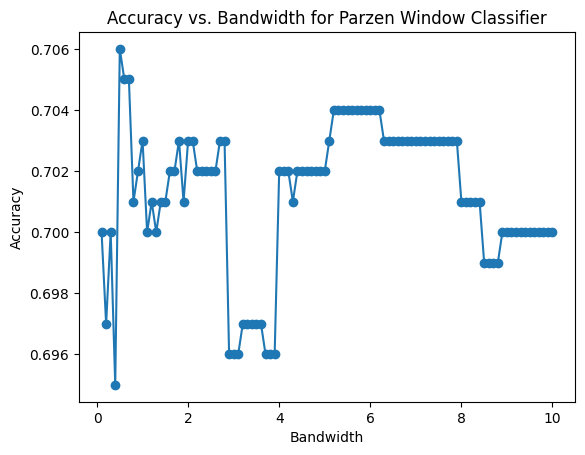

Best bandwidth for Parzen Window Classifier: 0.5


In [ ]:
best_bandwidth = find_best_bandwidth(np.linspace(0.1, 10, 100), X_train_hist, y_train, X_test_hist, y_test)
print(f"Best bandwidth for Parzen Window Classifier: {best_bandwidth}")

In [ ]:
pwc = ParzenWindowClassifier(bandwidth=best_bandwidth)
pwc.fit(X_train_hist, y_train)
predictions = pwc.predict(X_test_hist)
parzen_accuracy = accuracy_score(y_test, predictions)
print(f"Parzen Window Accuracy: {parzen_accuracy}")

Parzen Window Accuracy: 0.706


## Results


In [ ]:
def calculate_accuracies(X_train, y_train, X_test, y_test):
  accuracies = {}

  knn = KNeighborsClassifier(n_neighbors=best_k_knn)
  knn.fit(X_train, y_train)
  knn_predictions = knn.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_predictions)
  accuracies['KNN'] = knn_accuracy

  nc = NearestCentroid()
  nc.fit(X_train, y_train)
  nc_predictions = nc.predict(X_test)
  nc_accuracy = accuracy_score(y_test, nc_predictions)
  accuracies['Nearest Centroid'] = nc_accuracy

  nb = GaussianNB()
  nb.fit(X_train, y_train)
  nb_predictions = nb.predict(X_test)
  nb_accuracy = accuracy_score(y_test, nb_predictions)
  accuracies['Naive Bayes'] = nb_accuracy

  pwc = ParzenWindowClassifier(bandwidth=best_bandwidth)
  pwc.fit(X_train, y_train)
  predictions = pwc.predict(X_test)
  parzen_accuracy = accuracy_score(y_test, predictions)
  accuracies['Parzen Window'] = parzen_accuracy


  return accuracies

In [ ]:
def results():
  accuracies_gradient = calculate_accuracies(X_train_gradient, y_train, X_test_gradient, y_test)
  accuracies_hist = calculate_accuracies(X_train_hist, y_train, X_test_hist, y_test)
  accuracies_zoning = calculate_accuracies(X_train_zoning, y_train, X_test_zoning, y_test)

  results = {
      'Gradient': accuracies_gradient,
      'Histogram': accuracies_hist,
      'Zoning': accuracies_zoning
  }

  return results

In [ ]:
res = results()
print(res)

{'Gradient': {'KNN': 0.94, 'Nearest Centroid': 0.861, 'Naive Bayes': 0.649, 'Parzen Window': 0.843}, 'Histogram': {'KNN': 0.764, 'Nearest Centroid': 0.59, 'Naive Bayes': 0.356, 'Parzen Window': 0.706}, 'Zoning': {'KNN': 0.627, 'Nearest Centroid': 0.561, 'Naive Bayes': 0.165, 'Parzen Window': 0.539}}


In [52]:
res_df = pd.DataFrame(res)

res_df

,Gradient,Histogram,Zoning
KNN,0.940,0.764,0.627
Nearest Centroid,0.861,0.590,0.561
Naive Bayes,0.649,0.356,0.165
Parzen Window,0.843,0.706,0.539


## Evaluating

In [51]:
start_time = time.time()
knn_predictions = knn.predict(X_test_gradient)
knn_time = time.time() - start_time
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}, Time: {knn_time}")


KNN Accuracy: 0.94, Time: 74.81867551803589


### Robustness

In [71]:
def evaluate_robustness(method, X_train):
    def create_models():
        knn = KNeighborsClassifier(n_neighbors=best_k_knn)
        knn.fit(X_train, y_train)

        nc = NearestCentroid()
        nc.fit(X_train, y_train)

        nb = GaussianNB()
        nb.fit(X_train, y_train)

        pwc = ParzenWindowClassifier(bandwidth=best_bandwidth)
        pwc.fit(X_train, y_train)

        return {'KNN': knn, 'NearestCentroid': nc, 'NaiveBayes': nb, 'ParzenWindow': pwc}

    models = create_models()
    results = {}

    for name, model in models.items():
        results[name] = {}

        rotated_images = [rotate(img, angle=15, mode='wrap') for img in X_test]
        if method == 'Gradient':
            rotated_images_feature = np.array([extract_gradient_features(img) for img in rotated_images])
        elif method == 'Histogram':
            rotated_images_feature = np.array([vertical_horizontal_histogram(img) for img in rotated_images])
        elif method == 'Zoning':
            rotated_images_feature = np.array([zoning(img) for img in rotated_images])

        rotated_predictions = model.predict(rotated_images_feature)
        rotated_accuracy = accuracy_score(y_test, rotated_predictions)
        results[name]['Rotated'] = rotated_accuracy

        noisy_images = [random_noise(img, mode='s&p', amount=0.05) for img in X_test]
        if method == 'Gradient':
            noisy_images_feature = np.array([extract_gradient_features(img) for img in noisy_images])
        elif method == 'Histogram':
            noisy_images_feature = np.array([vertical_horizontal_histogram(img) for img in noisy_images])
        elif method == 'Zoning':
            noisy_images_feature = np.array([zoning(img) for img in noisy_images])

        noisy_predictions = model.predict(noisy_images_feature)
        noisy_accuracy = accuracy_score(y_test, noisy_predictions)
        results[name]['Noisy'] = noisy_accuracy

    return results


In [69]:
def evaluate_robustness_for_all_features():
    feature_extractions = {
        'Gradient': (X_train_gradient),
        'Histogram': (X_train_hist),
        'Zoning': (X_train_zoning)
    }

    robustness_results = {}

    for feature_name, (X_train_feature) in feature_extractions.items():
        robustness_results[feature_name] = evaluate_robustness(feature_name, X_train_feature)

    return robustness_results


In [72]:
robustness_results = evaluate_robustness_for_all_features()
print(robustness_results)

{'Gradient': {'KNN': {'Rotated': 0.767, 'Noisy': 0.086}, 'NearestCentroid': {'Rotated': 0.66, 'Noisy': 0.086}, 'NaiveBayes': {'Rotated': 0.517, 'Noisy': 0.14}, 'ParzenWindow': {'Rotated': 0.55, 'Noisy': 0.084}}, 'Histogram': {'KNN': {'Rotated': 0.547, 'Noisy': 0.086}, 'NearestCentroid': {'Rotated': 0.423, 'Noisy': 0.086}, 'NaiveBayes': {'Rotated': 0.338, 'Noisy': 0.12}, 'ParzenWindow': {'Rotated': 0.483, 'Noisy': 0.086}}, 'Zoning': {'KNN': {'Rotated': 0.555, 'Noisy': 0.086}, 'NearestCentroid': {'Rotated': 0.515, 'Noisy': 0.086}, 'NaiveBayes': {'Rotated': 0.196, 'Noisy': 0.119}, 'ParzenWindow': {'Rotated': 0.474, 'Noisy': 0.086}}}


In [73]:
robustness_results_df = pd.DataFrame(robustness_results)
robustness_results_df

,Gradient,Histogram,Zoning
KNN,"{'Rotated': 0.767, 'Noisy': 0.086}","{'Rotated': 0.547, 'Noisy': 0.086}","{'Rotated': 0.555, 'Noisy': 0.086}"
NearestCentroid,"{'Rotated': 0.66, 'Noisy': 0.086}","{'Rotated': 0.423, 'Noisy': 0.086}","{'Rotated': 0.515, 'Noisy': 0.086}"
NaiveBayes,"{'Rotated': 0.517, 'Noisy': 0.14}","{'Rotated': 0.338, 'Noisy': 0.12}","{'Rotated': 0.196, 'Noisy': 0.119}"
ParzenWindow,"{'Rotated': 0.55, 'Noisy': 0.084}","{'Rotated': 0.483, 'Noisy': 0.086}","{'Rotated': 0.474, 'Noisy': 0.086}"


### Change Training Size

In [74]:
def evaluate_performance_vs_training_size(training_sizes):
    results = {
        'Gradient': {'KNN': [], 'Nearest Centroid': [], 'Naive Bayes': [], 'Parzen Window': []},
        'Histogram': {'KNN': [], 'Nearest Centroid': [], 'Naive Bayes': [], 'Parzen Window': []},
        'Zoning': {'KNN': [], 'Nearest Centroid': [], 'Naive Bayes': [], 'Parzen Window': []}
    }

    for training_size in training_sizes:
        X_train_gradient_subset = X_train_gradient[:training_size]
        y_train_subset = y_train[:training_size]
        X_train_hist_subset = X_train_hist[:training_size]
        X_train_zoning_subset = X_train_zoning[:training_size]

        accuracies_gradient = calculate_accuracies(X_train_gradient_subset, y_train_subset, X_test_gradient, y_test)
        accuracies_hist = calculate_accuracies(X_train_hist_subset, y_train_subset, X_test_hist, y_test)
        accuracies_zoning = calculate_accuracies(X_train_zoning_subset, y_train_subset, X_test_zoning, y_test)

        results['Gradient']['KNN'].append(accuracies_gradient['KNN'])
        results['Gradient']['Nearest Centroid'].append(accuracies_gradient['Nearest Centroid'])
        results['Gradient']['Naive Bayes'].append(accuracies_gradient['Naive Bayes'])
        results['Gradient']['Parzen Window'].append(accuracies_gradient['Parzen Window'])

        results['Histogram']['KNN'].append(accuracies_hist['KNN'])
        results['Histogram']['Nearest Centroid'].append(accuracies_hist['Nearest Centroid'])
        results['Histogram']['Naive Bayes'].append(accuracies_hist['Naive Bayes'])
        results['Histogram']['Parzen Window'].append(accuracies_hist['Parzen Window'])

        results['Zoning']['KNN'].append(accuracies_zoning['KNN'])
        results['Zoning']['Nearest Centroid'].append(accuracies_zoning['Nearest Centroid'])
        results['Zoning']['Naive Bayes'].append(accuracies_zoning['Naive Bayes'])
        results['Zoning']['Parzen Window'].append(accuracies_zoning['Parzen Window'])


    return results


In [76]:
change_train_res = evaluate_performance_vs_training_size([100, 500, 1000])

In [96]:
change_train_res

{'Gradient': {'KNN': [0.759, 0.871, 0.91],
  'Nearest Centroid': [0.796, 0.849, 0.852],
  'Naive Bayes': [0.522, 0.731, 0.728],
  'Parzen Window': [0.762, 0.876, 0.903]},
 'Histogram': {'KNN': [0.613, 0.674, 0.726],
  'Nearest Centroid': [0.559, 0.578, 0.581],
  'Naive Bayes': [0.432, 0.472, 0.424],
  'Parzen Window': [0.613, 0.673, 0.693]},
 'Zoning': {'KNN': [0.527, 0.573, 0.606],
  'Nearest Centroid': [0.551, 0.551, 0.568],
  'Naive Bayes': [0.237, 0.198, 0.185],
  'Parzen Window': [0.5, 0.537, 0.559]}}

In [77]:
change_train_res_df = pd.DataFrame(change_train_res)
change_train_res_df

,Gradient,Histogram,Zoning
KNN,"[0.759, 0.871, 0.91]","[0.613, 0.674, 0.726]","[0.527, 0.573, 0.606]"
Nearest Centroid,"[0.796, 0.849, 0.852]","[0.559, 0.578, 0.581]","[0.551, 0.551, 0.568]"
Naive Bayes,"[0.522, 0.731, 0.728]","[0.432, 0.472, 0.424]","[0.237, 0.198, 0.185]"
Parzen Window,"[0.762, 0.876, 0.903]","[0.613, 0.673, 0.693]","[0.5, 0.537, 0.559]"


### Combine Features

In [78]:
def calculate_accuracies_combined_features(X_train_list, y_train, X_test_list, y_test):
  accuracies = {}
  for i in range(1 << len(X_train_list)):
    combined_X_train = []
    combined_X_test = []
    feature_names = []
    for j in range(len(X_train_list)):
      if (i >> j) & 1:
        combined_X_train.append(X_train_list[j])
        combined_X_test.append(X_test_list[j])
        feature_names.append(str(j))

    if not combined_X_train:
      continue

    combined_X_train = np.concatenate(combined_X_train, axis=1) if len(combined_X_train) > 1 else combined_X_train[0]
    combined_X_test = np.concatenate(combined_X_test, axis=1) if len(combined_X_test) > 1 else combined_X_test[0]


    feature_combination_name = "_".join(feature_names)
    accuracies[feature_combination_name] = {}

    knn = KNeighborsClassifier(n_neighbors=best_k_knn)
    knn.fit(combined_X_train, y_train)
    knn_predictions = knn.predict(combined_X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    accuracies[feature_combination_name]['KNN'] = knn_accuracy

    nc = NearestCentroid()
    nc.fit(combined_X_train, y_train)
    nc_predictions = nc.predict(combined_X_test)
    nc_accuracy = accuracy_score(y_test, nc_predictions)
    accuracies[feature_combination_name]['Nearest Centroid'] = nc_accuracy

    nb = GaussianNB()
    nb.fit(combined_X_train, y_train)
    nb_predictions = nb.predict(combined_X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    accuracies[feature_combination_name]['Naive Bayes'] = nb_accuracy


    pwc = ParzenWindowClassifier(bandwidth=best_bandwidth)
    pwc.fit(combined_X_train, y_train)
    predictions = pwc.predict(combined_X_test)
    parzen_accuracy = accuracy_score(y_test, predictions)
    accuracies[feature_combination_name]['Parzen Window'] = parzen_accuracy


  return accuracies



In [79]:
combine_features_res = calculate_accuracies_combined_features([X_train_gradient, X_train_hist, X_train_zoning], y_train, [X_test_gradient, X_test_hist, X_test_zoning], y_test)

In [97]:
combine_features_res

{'0': {'KNN': 0.94,
  'Nearest Centroid': 0.861,
  'Naive Bayes': 0.649,
  'Parzen Window': 0.843},
 '1': {'KNN': 0.764,
  'Nearest Centroid': 0.59,
  'Naive Bayes': 0.356,
  'Parzen Window': 0.706},
 '0_1': {'KNN': 0.94,
  'Nearest Centroid': 0.861,
  'Naive Bayes': 0.649,
  'Parzen Window': 0.904},
 '2': {'KNN': 0.627,
  'Nearest Centroid': 0.561,
  'Naive Bayes': 0.165,
  'Parzen Window': 0.539},
 '0_2': {'KNN': 0.94,
  'Nearest Centroid': 0.861,
  'Naive Bayes': 0.649,
  'Parzen Window': 0.872},
 '1_2': {'KNN': 0.762,
  'Nearest Centroid': 0.59,
  'Naive Bayes': 0.363,
  'Parzen Window': 0.725},
 '0_1_2': {'KNN': 0.94,
  'Nearest Centroid': 0.861,
  'Naive Bayes': 0.649,
  'Parzen Window': 0.905}}

In [80]:
combine_features_res_df = pd.DataFrame(combine_features_res)
combine_features_res_df

,0,1,0_1,2,0_2,1_2,0_1_2
KNN,0.940,0.764,0.940,0.627,0.940,0.762,0.940
Nearest Centroid,0.861,0.590,0.861,0.561,0.861,0.590,0.861
Naive Bayes,0.649,0.356,0.649,0.165,0.649,0.363,0.649
Parzen Window,0.843,0.706,0.904,0.539,0.872,0.725,0.905


In [81]:
new_combine_features_res_df = combine_features_res_df.copy()

columns_to_drop = ['0', '1', '2']
new_combine_features_res_df = new_combine_features_res_df.drop(columns=columns_to_drop, errors='ignore')

rename_dict = {
    "0_1": "Gradient_Histogram",
    "0_2": "Gradient_Zoning",
    "1_2": "Histogram_Zoning",
    "0_1_2": "Gradient_Histogram_Zoning"
}

new_combine_features_res_df = new_combine_features_res_df.rename(columns=rename_dict)

new_combine_features_res_df


,Gradient_Histogram,Gradient_Zoning,Histogram_Zoning,Gradient_Histogram_Zoning
KNN,0.940,0.940,0.762,0.940
Nearest Centroid,0.861,0.861,0.590,0.861
Naive Bayes,0.649,0.649,0.363,0.649
Parzen Window,0.904,0.872,0.725,0.905


### Confusion Matrix

In [82]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
  ax.set_title(title)
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

In [83]:
def generate_and_plot_confusion_matrices(X_train, y_train, X_test, y_test, feature_name):
  fig, axes = plt.subplots(1, 4, figsize=(20, 5))
  fig.suptitle(f"Confusion Matrices for {feature_name} Feature Extraction")

  knn = KNeighborsClassifier(n_neighbors=best_k_knn)
  knn.fit(X_train, y_train)
  knn_predictions = knn.predict(X_test)
  plot_confusion_matrix(y_test, knn_predictions, "KNN", axes[0])

  nc = NearestCentroid()
  nc.fit(X_train, y_train)
  nc_predictions = nc.predict(X_test)
  plot_confusion_matrix(y_test, nc_predictions, "Nearest Centroid", axes[1])

  nb = GaussianNB()
  nb.fit(X_train, y_train)
  nb_predictions = nb.predict(X_test)
  plot_confusion_matrix(y_test, nb_predictions, "Naive Bayes", axes[2])

  pwc = ParzenWindowClassifier(bandwidth=best_bandwidth)
  pwc.fit(X_train, y_train)
  pwc_predictions = pwc.predict(X_test)
  plot_confusion_matrix(y_test, pwc_predictions, "Parzen Window", axes[3])

  plt.tight_layout()
  plt.show()

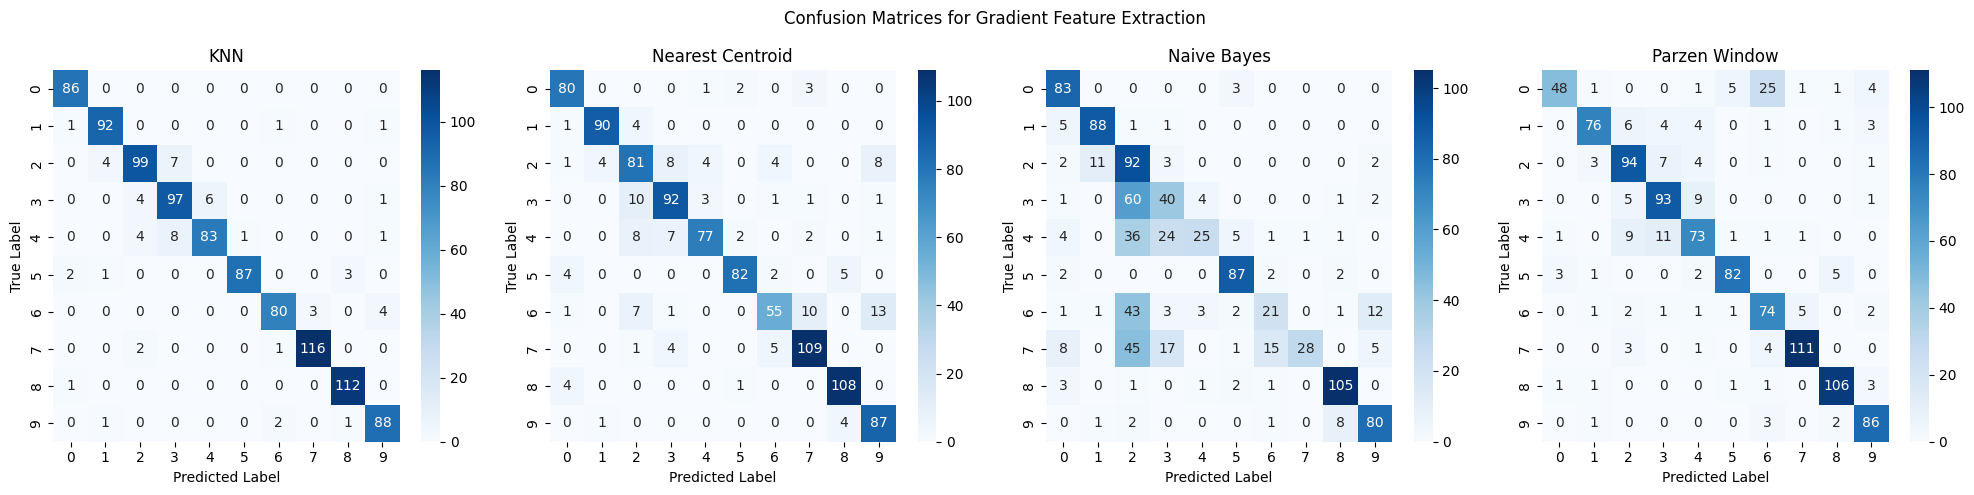

In [84]:
generate_and_plot_confusion_matrices(X_train_gradient, y_train, X_test_gradient, y_test, "Gradient")

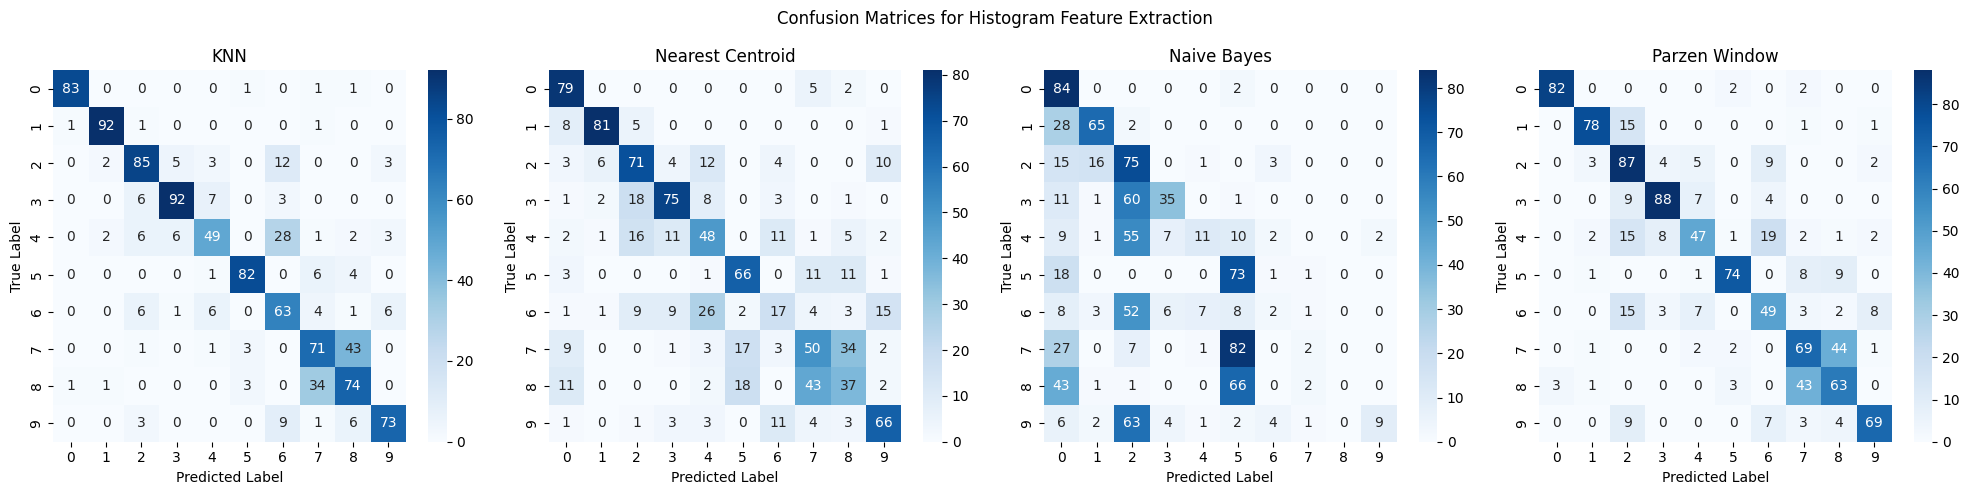

In [85]:
generate_and_plot_confusion_matrices(X_train_hist, y_train, X_test_hist, y_test, "Histogram")

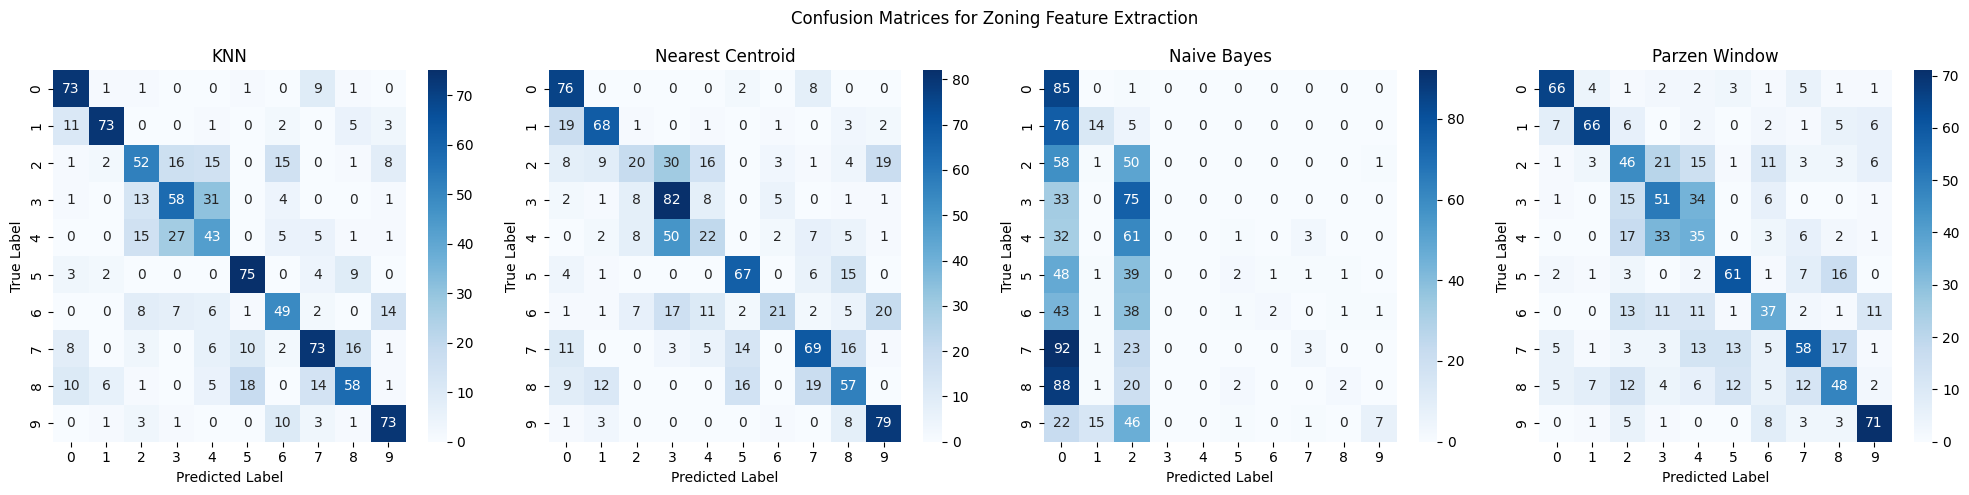

In [86]:
generate_and_plot_confusion_matrices(X_train_zoning, y_train, X_test_zoning, y_test, "Zoning")


---

now something different :)

welcome to NN world ;)

## Neural Networks

In [87]:
X_train, X_test = new_data1[:50000], new_data1[50000:60000]
y_train, y_test = labels[:50000], labels[50000:60000]

In [88]:
X_train_flattened = np.array([x.reshape(-1) for x in X_train])
X_test_flattened = np.array([x.reshape(-1) for x in X_test])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=600, activation='relu', solver='adam', random_state=42)

In [91]:
mlp.fit(X_train_flattened, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=600, random_state=42)

In [92]:
y_pred = mlp.predict(X_test_flattened)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy}")

MLP Accuracy: 0.9813


In [94]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       975
           1       0.99      0.99      0.99       999
           2       0.97      0.97      0.97       992
           3       0.98      0.96      0.97      1005
           4       0.97      0.97      0.97       991
           5       0.99      0.99      0.99      1020
           6       0.97      0.97      0.97       992
           7       0.99      1.00      0.99      1006
           8       0.99      1.00      0.99      1024
           9       0.97      0.98      0.98       996

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



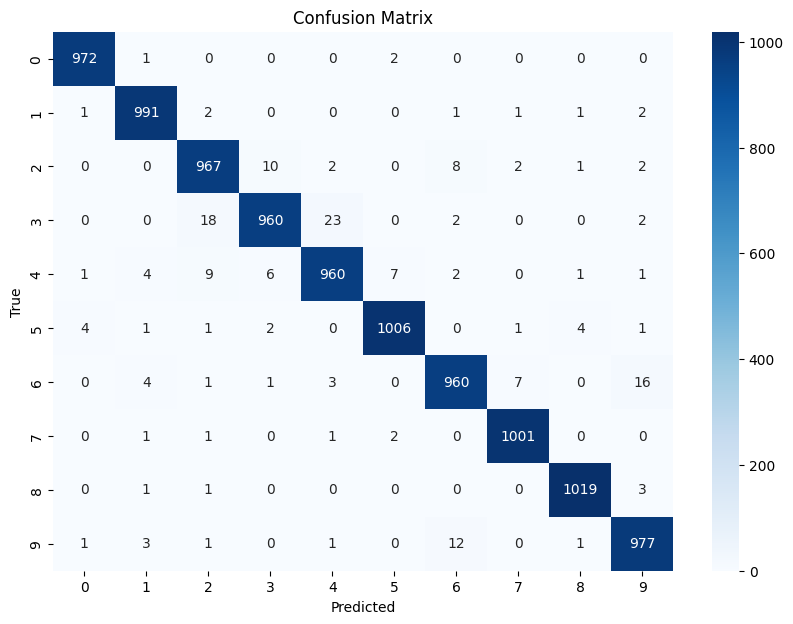

In [95]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()